<a href="https://colab.research.google.com/github/MitchellMBurton/Allergy_Data_Analysis_Viz/blob/main/Allergy_Data_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##### GOAL #####
# To understand parental behaviours around food reintroduction.
# 1.	Does a successful food challenge equate to successful food introduction? 
# 2.	Are there any particular characteristic of patients that could predict food introduction patterns
# 3.	Is food introduction sustained/ maintained when assessed at 3 specific time points namely 1, 3 and 6 months post successful food challenge
# 4.	Barriers to a successful introduction and maintenance
# 5.	Patients/ Parents perception of the value of inpatient food challenges

# Primary Hypothesis: To test the association of patient characteristics and food introduction patterns
# Ho: There is no association between patient characteristics and food introduction patterns
# H1: There is an association between patient characteristics and food introduction patterns.


In [ ]:
# Load imports
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [ ]:
# Load data into dataframe
# study_df = pd.read_excel('Study Data.xlsx')
study_df = pd.read_csv('Study_Data.csv')
study_df.head(5)

,Patient Number,Date of challenge,Gender,DOB,Food challenged,Avoided for,Worst Reaction,SPT,Other food allergies,Maintanence of food following a previous successful food challenge,"Concomitant atopy: 0=Nil, 1=Eczema, 2=Asthma, 3=AR (Allergic Rhinitis)",Mode 1Month,Mode 3Month,Mode 6Month,1M-Introduced food?,1M-Time to introduction,1M-Frequency of eating,"1M-Non Intro reasons:1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Did not get a chance to introduce",1M-Did you find it useful to have an inpatient hospital challenge(Patient Feedback),1M What did you want to achieve with the inpatient challenge: 1: If my child is still allergic to food; 2: If I will be able to introduce food into my child’s diet; 3.Accuracy of the skin prick test,3M-Continues to eat,3M-Frequency,"3M-nonmaintainencereasons:1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Not part of family diet",3M-Could we help in ensuring maintenance of food (Patientfeedback,3M Please provide your thoughts on how we might be able to help you maintain the food item in your child's diet?,6M-Continues to eat?,6M-Frequency,"6M-Nonmaintanence reasons: 1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Not part of family diet",6M-Could we help in ensuring maintenance of food (Patientfeedback,6M Please provide your thoughts on how we might be able to help you maintain the food item in your child's diet?
0,1,11/03/2020,Male,15/05/2019,Peanut,<2 yrs,Never eaten,1,">2 (Egg, Dairy, Cashew)",NaN,1,Online,Online,Online,Yes,Within a fortnight,Some days of the week,0,Yes,"1,2,3",Yes,Weekly,0,0,0,Yes,Fortnightly,0,No,0
1,2,4/06/2020,Female,16/02/2008,Meat,<2 yrs,Anaphylaxis,Neg,<2 (Turkey),NaN,3,Phone,Online,No further f/u,Yes,The next day,Some days of the week,0,Yes,1,No,0,2,No,0,NaN,NaN,NaN,NaN,NaN
2,3,15/04/2020,Female,28/07/2018,Peanut,<2 yrs,Anaphylaxis,Neg,0,NaN,0,Online,Online,Online,Yes,The next day,Some days of the week,0,Yes,2,Yes,Fortnightly,0,0,0,Yes,Weekly,0,No,0
3,4,4/03/2020,Male,3/11/2010,Seafood,>2 yrs,Never eaten,1,">2 (Egg,Peanut,Snapper)",Yes(Whitefish),2,Online,Online,Phone,Yes,Within a week's time,once a fortnight,0,Yes,2,Yes,Once every couple of months,0,0,0,Yes,Once every couple of months,0,Yes,Support
4,5,23/01/2020,Male,27/04/2016,Egg,<2 yrs,Anaphylaxis,Equivocal,0,NaN,1,Phone,No further f/u,No further f/u,No,0,0,1,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create Age column
study_df['Age (Years)'] = pd.to_datetime(study_df['Date of challenge']) - pd.to_datetime(study_df['DOB'])
study_df['Age (Years)'] = round(study_df['Age (Years)']/np.timedelta64(1, 'Y'), 0)
study_df.head(5)

,Patient Number,Date of challenge,Gender,DOB,Food challenged,Avoided for,Worst Reaction,SPT,Other food allergies,Maintanence of food following a previous successful food challenge,"Concomitant atopy: 0=Nil, 1=Eczema, 2=Asthma, 3=AR (Allergic Rhinitis)",Mode 1Month,Mode 3Month,Mode 6Month,1M-Introduced food?,1M-Time to introduction,1M-Frequency of eating,"1M-Non Intro reasons:1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Did not get a chance to introduce",1M-Did you find it useful to have an inpatient hospital challenge(Patient Feedback),1M What did you want to achieve with the inpatient challenge: 1: If my child is still allergic to food; 2: If I will be able to introduce food into my child’s diet; 3.Accuracy of the skin prick test,3M-Continues to eat,3M-Frequency,"3M-nonmaintainencereasons:1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Not part of family diet",3M-Could we help in ensuring maintenance of food (Patientfeedback,3M Please provide your thoughts on how we might be able to help you maintain the food item in your child's diet?,6M-Continues to eat?,6M-Frequency,"6M-Nonmaintanence reasons: 1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Not part of family diet",6M-Could we help in ensuring maintenance of food (Patientfeedback,6M Please provide your thoughts on how we might be able to help you maintain the food item in your child's diet?,Age (Years)
0,1,11/03/2020,Male,15/05/2019,Peanut,<2 yrs,Never eaten,1,">2 (Egg, Dairy, Cashew)",NaN,1,Online,Online,Online,Yes,Within a fortnight,Some days of the week,0,Yes,"1,2,3",Yes,Weekly,0,0,0,Yes,Fortnightly,0,No,0,1.0
1,2,4/06/2020,Female,16/02/2008,Meat,<2 yrs,Anaphylaxis,Neg,<2 (Turkey),NaN,3,Phone,Online,No further f/u,Yes,The next day,Some days of the week,0,Yes,1,No,0,2,No,0,NaN,NaN,NaN,NaN,NaN,12.0
2,3,15/04/2020,Female,28/07/2018,Peanut,<2 yrs,Anaphylaxis,Neg,0,NaN,0,Online,Online,Online,Yes,The next day,Some days of the week,0,Yes,2,Yes,Fortnightly,0,0,0,Yes,Weekly,0,No,0,2.0
3,4,4/03/2020,Male,3/11/2010,Seafood,>2 yrs,Never eaten,1,">2 (Egg,Peanut,Snapper)",Yes(Whitefish),2,Online,Online,Phone,Yes,Within a week's time,once a fortnight,0,Yes,2,Yes,Once every couple of months,0,0,0,Yes,Once every couple of months,0,Yes,Support,10.0
4,5,23/01/2020,Male,27/04/2016,Egg,<2 yrs,Anaphylaxis,Equivocal,0,NaN,1,Phone,No further f/u,No further f/u,No,0,0,1,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [ ]:
## Clean and prepare data
# Shape of data before cleaning
shape_before = study_df.shape

# Rename columns into shorter, user friendly names
study_df_colnames = []

# Remove white space before and after element
study_df = study_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Remove rows missing 15 or more values.
row_nan_count = np.array(study_df.isnull().sum(axis=1))
row_nan_bool = row_nan_count<=15
study_df = study_df[row_nan_bool]

# Ensure correct data type for each columns
# study_df.dtypes
study_df = study_df.astype(str)
# study_df = study_df.apply(str.lower())

# Shape of data after cleaning
shape_after = study_df.shape

# Show change in data after cleaning
bef_aft = pd.DataFrame([shape_before, shape_after])
bef_aft = bef_aft.T
bef_aft.columns = ['Before', 'After']
print(bef_aft)


   Before  After
0     124    110
1      31     31


In [ ]:
# # Checking differences in summary of successful and unsuccessful patients
# study_df_success = study_df[study_df['6M-Continues to eat?']=='Yes']
# study_df_fail = study_df[study_df['6M-Continues to eat?']=='No']

# study_df_success.describe()
# study_df_fail.describe()

In [ ]:
# 1.	Does a successful food challenge equate to successful food introduction? 
# Maintenance of food following previous successful food challenge
study_df['Maintanence of food following a previous successful food challenge'] = study_df['Maintanence of food following a previous successful food challenge'].astype(str)
study_df['Maintanence of food following a previous successful food challenge'] = study_df['Maintanence of food following a previous successful food challenge'].apply(lambda x: 'Yes' if 'Yes' in x else x)
study_df['Maintanence of food following a previous successful food challenge'] = study_df['Maintanence of food following a previous successful food challenge'].apply(lambda x: 'No' if 'No' in x else x)
food_chl_main = pd.DataFrame(study_df['Maintanence of food following a previous successful food challenge'].value_counts()).T
food_chl_main["Total"] = food_chl_main.sum(axis=1)
print(food_chl_main, '\n')
print("% Of respondents who previously had a succesful food challenge")
print(food_chl_main.Yes/(food_chl_main.No+food_chl_main.Yes)*100)


                                                    nan  Yes  No  Total
Maintanence of food following a previous succes...   76   30   4    110 

% Of respondents who previously had a succesful food challenge
Maintanence of food following a previous successful food challenge    88.235294
dtype: float64


In [ ]:
# 1 Continued: Percentage of respondents (Yes or No not Nan)
food_chl_main_resp = food_chl_main[['Yes', 'No']].T
food_chl_main_resp['%'] = food_chl_main_resp['Maintanence of food following a previous successful food challenge']/food_chl_main_resp['Maintanence of food following a previous successful food challenge'].sum()*100
round(food_chl_main_resp, 1)


,Maintanence of food following a previous successful food challenge,%
Yes,30,88.2
No,4,11.8


In [ ]:
# 2.	Are there any particular characteristic of patients that could predict food introduction patterns


In [ ]:
# Hypothesis test
# Perform a chi-squared test

# Select feature columns
feat_cols = ['Gender', 'Age (Years)', 'Food challenged', 'Avoided for', 'Worst Reaction', 'SPT ', 
             'Other food allergies', 'Maintanence of food following a previous successful food challenge', 
             'Concomitant atopy: 0=Nil, 1=Eczema, 2=Asthma, 3=AR (Allergic Rhinitis)', '6M-Continues to eat?']

# Create feature dataframe and remove rows where the 6-month outcome is Nan
study_df_chi = study_df[feat_cols].copy()
study_df_chi = study_df_chi[~study_df_chi['6M-Continues to eat?'].str.contains('nan')]
study_df_chi.head(5)



,Gender,Age (Years),Food challenged,Avoided for,Worst Reaction,SPT,Other food allergies,Maintanence of food following a previous successful food challenge,"Concomitant atopy: 0=Nil, 1=Eczema, 2=Asthma, 3=AR (Allergic Rhinitis)",6M-Continues to eat?
0,Male,1.0,Peanut,<2 yrs,Never eaten,1,">2 (Egg, Dairy, Cashew)",nan,1,Yes
2,Female,2.0,Peanut,<2 yrs,Anaphylaxis,Neg,0,nan,0,Yes
3,Male,10.0,Seafood,>2 yrs,Never eaten,1,">2 (Egg,Peanut,Snapper)",Yes,2,Yes
6,Female,18.0,Treenut,>2 yrs,Mild to Moderate Allergic Reaction,2,<2 (Peanut),No,3,Yes
7,Female,1.0,Egg,<2 yrs,Anaphylaxis,1,0,nan,0,Yes


In [ ]:
# Hypothesis test continued
# Define chi squared test function
def chi_squared_test(cont_table):
  table = cont_table
  print(table)
  stat, p, dof, expected = chi2_contingency(table)
  print('dof=%d' % dof)
  # print(expected)
  # interpret test-statistic
  prob = 0.95
  critical = chi2.ppf(prob, dof)
  print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
  if abs(stat) >= critical:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')
  # interpret p-value
  alpha = 1.0 - prob
  print('significance=%.3f, p=%.3f' % (alpha, p))
  if p <= alpha:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')

In [ ]:
# Hypothesis test continued.
# Initialise cross table list and append each combination to it.
count_tables = list()
count_tables.append(pd.crosstab(study_df_chi['Gender'], study_df_chi['6M-Continues to eat?']))
count_tables.append(pd.crosstab(study_df_chi['Age (Years)'], study_df_chi['6M-Continues to eat?']))
count_tables.append(pd.crosstab(study_df_chi['Food challenged'], study_df_chi['6M-Continues to eat?']))
count_tables.append(pd.crosstab(study_df_chi['Avoided for'], study_df_chi['6M-Continues to eat?']))
count_tables.append(pd.crosstab(study_df_chi['Worst Reaction'], study_df_chi['6M-Continues to eat?']))
count_tables.append(pd.crosstab(study_df_chi['SPT '], study_df_chi['6M-Continues to eat?']))
count_tables.append(pd.crosstab(study_df_chi['Other food allergies'], study_df_chi['6M-Continues to eat?']))
count_tables.append(pd.crosstab(study_df_chi['Maintanence of food following a previous successful food challenge'], study_df_chi['6M-Continues to eat?']))
count_tables.append(pd.crosstab(study_df_chi['Concomitant atopy: 0=Nil, 1=Eczema, 2=Asthma, 3=AR (Allergic Rhinitis)'], study_df_chi['6M-Continues to eat?']))

# Perform chi squared test on each table
for table in count_tables:
  # print()
  chi_squared_test(table)
  print('\n')

6M-Continues to eat?  No  Yes
Gender                       
Female                 4   38
Male                   3   42
dof=1
probability=0.950, critical=3.841, stat=0.009
Independent (fail to reject H0)
significance=0.050, p=0.924
Independent (fail to reject H0)


6M-Continues to eat?  No  Yes
Age (Years)                  
0.0                    0    1
1.0                    0   26
10.0                   0    2
11.0                   1    2
12.0                   0    3
13.0                   0    5
15.0                   0    3
16.0                   0    5
18.0                   0    2
2.0                    1    9
3.0                    1    2
4.0                    2    3
5.0                    1    3
7.0                    1    0
8.0                    0    5
9.0                    0    9
dof=15
probability=0.950, critical=24.996, stat=30.458
Dependent (reject H0)
significance=0.050, p=0.010
Dependent (reject H0)


6M-Continues to eat?  No  Yes
Food challenged              
Dairy

,Yes,No,nan,%Yes,%No,%NaN
1M-Introduced food?,103,6,1,93.6,5.5,0.9
3M-Continues to eat,90,8,12,81.8,7.3,10.9
6M-Continues to eat?,80,7,23,72.7,6.4,20.9


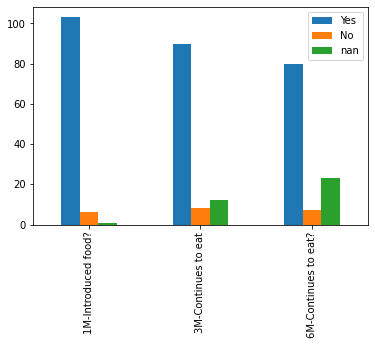

In [ ]:
# 3.	Is food introduction sustained/ maintained when assessed at 3 specific time points namely 1, 3 and 6 months post successful food challenge
# Exploring if continues to eat
cont_cols = ['Gender', 'Food challenged', '1M-Introduced food?',
             '3M-Continues to eat', '6M-Continues to eat?']
continued_df = study_df[cont_cols]

# Data on whether ptients continued to eat food
cont_1m = continued_df['1M-Introduced food?'].value_counts(dropna=False)
cont_3m = continued_df['3M-Continues to eat'].value_counts(dropna=False)
cont_6m = continued_df['6M-Continues to eat?'].value_counts(dropna=False)
cont_y_n_df = pd.DataFrame([cont_1m,cont_3m,cont_6m])
cont_y_n_df_barplot = cont_y_n_df.plot.bar()
# Add percentage 
cont_y_n_df['%Yes'] = cont_y_n_df.iloc[:,0]/(cont_y_n_df.iloc[:,0] + cont_y_n_df.iloc[:,1] + cont_y_n_df.iloc[:,2])*100
cont_y_n_df['%No'] = cont_y_n_df.iloc[:,1]/(cont_y_n_df.iloc[:,0] + cont_y_n_df.iloc[:,1] + cont_y_n_df.iloc[:,2])*100
cont_y_n_df['%NaN'] = cont_y_n_df.iloc[:,2]/(cont_y_n_df.iloc[:,0] + cont_y_n_df.iloc[:,1] + cont_y_n_df.iloc[:,2])*100

round(cont_y_n_df, 1)
# cont_y_n_df_barplot

In [ ]:
cont_y_n_df_barplot

In [ ]:
# 4.	Barriers to a successful introduction and maintenance (CAN ALSO BE DISCUSSED WITH THE FEEDBACK)
# Exploring barriers to successful introduciton and maintenance 
barriers_df = study_df[["1M-Non Intro reasons:1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Did not get a chance to introduce", 
              '3M-nonmaintainencereasons:1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Not part of family diet', 
              '6M-Nonmaintanence reasons: 1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Not part of family diet']
             ].astype(str)
barriers_df = barriers_df.replace('“My child would not eat the food due to taste, smell or texture issues”', '1')
barriers_df = barriers_df.replace('“My child reacted to the food”', '2')

# barriers_df
# My child would not eat the food due to taste, smell or texture issues

In [ ]:
# Q 4 continued
barr1m = barriers_df['1M-Non Intro reasons:1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Did not get a chance to introduce'].value_counts(dropna=False)
barr3m = barriers_df['3M-nonmaintainencereasons:1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Not part of family diet'].value_counts(dropna=False)
barr6m = barriers_df['6M-Nonmaintanence reasons: 1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Not part of family diet'].value_counts(dropna=False)

barr_df = pd.DataFrame([barr1m, barr3m, barr6m])
barr_df = barr_df.T
# barr_df = barr_df.drop(barr_df.index[0])
barr_df

,"1M-Non Intro reasons:1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Did not get a chance to introduce","3M-nonmaintainencereasons:1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Not part of family diet","6M-Nonmaintanence reasons: 1: Refusal to eat (Texture, Smell or taste issues), 2: Reacted on trial at home, 3: Not part of family diet"
0,103.0,90.0,80.0
1,3.0,4.0,2.0
nan,1.0,12.0,23.0
"1,3",1.0,NaN,1.0
3,1.0,1.0,3.0
2,1.0,3.0,1.0


Text(0.5, 1.0, '1-, 3- & 6-Months: Reason for non-maintenance')

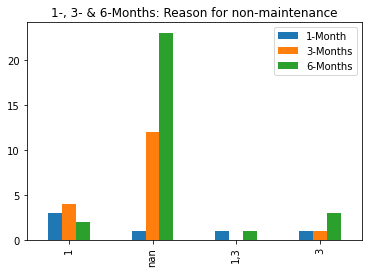

In [ ]:
# # PLot barriers
barr_df = barr_df.drop(barr_df.index[[0, 5]])
# barr_df = barr_df.drop(["nan"])
# barr_df = barr_df.drop(barr_df.index[])
barr_df.plot.bar()
plt.legend(["1-Month", '3-Months', '6-Months'])
plt.title('1-, 3- & 6-Months: Reason for non-maintenance')

In [ ]:
# 5.	Patients/ Parents perception of the value of inpatient food challenges

# Patients / parents perceptions of the value of inpatients food challenges
feedback_cols = ['3M-Could we help in ensuring  maintenance of food (Patientfeedback', 
                 "3M Please provide your thoughts on how we might be able to help you maintain the food item in your child's diet?",
                 '6M-Could we help in ensuring  maintenance of food (Patientfeedback', "6M Please provide your thoughts on how we might be able to help you maintain the food item in your child's diet?"]

feedback_df = study_df[feedback_cols]

feedback3m = feedback_df['3M-Could we help in ensuring  maintenance of food (Patientfeedback'].value_counts()
feedback3m1 = feedback_df["3M Please provide your thoughts on how we might be able to help you maintain the food item in your child's diet?"].value_counts()
feedback6m = feedback_df['6M-Could we help in ensuring  maintenance of food (Patientfeedback'].value_counts()
feedback6m1 = feedback_df["6M Please provide your thoughts on how we might be able to help you maintain the food item in your child's diet?"].value_counts()

feedback_df_help_y_n = pd.DataFrame([feedback3m, feedback6m])
feedback_df_advice = pd.DataFrame([feedback3m1, feedback6m1])

feedback_df_help_y_n = feedback_df_help_y_n.T
feedback_df_advice = feedback_df_advice.T

print(feedback_df_help_y_n, '\n')
print(feedback_df_advice)
feedback_df_help_y_n

     3M-Could we help in ensuring  maintenance of food (Patientfeedback  6M-Could we help in ensuring  maintenance of food (Patientfeedback
0                                                 90.0                                                                 NaN                 
nan                                               12.0                                                                23.0                 
No                                                 6.0                                                                63.0                 
Yes                                                2.0                                                                24.0                  

                   3M Please provide your thoughts on how we might be able to help you maintain the food item in your child's diet?  6M Please provide your thoughts on how we might be able to help you maintain the food item in your child's diet?
0                                                   

,3M-Could we help in ensuring maintenance of food (Patientfeedback,6M-Could we help in ensuring maintenance of food (Patientfeedback
0,90.0,NaN
nan,12.0,23.0
No,6.0,63.0
Yes,2.0,24.0


Text(0.5, 1.0, '3- & 6-Months: Would Support Help?')

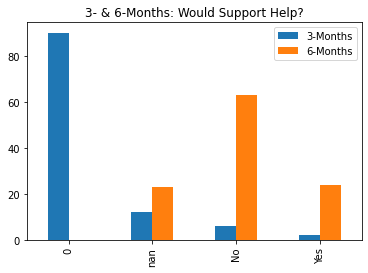

In [ ]:
# Create feedback plot
feedback_df_help_y_n.plot.bar()
plt.legend(['3-Months', '6-Months'])
plt.title('3- & 6-Months: Would Support Help?')

Text(0.5, 1.0, '3- & 6-Months: Would Support Help?')

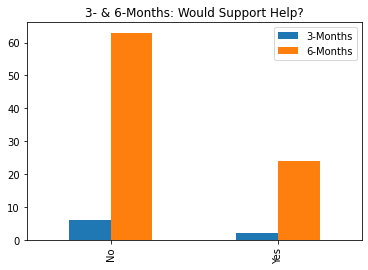

In [ ]:
# Create adjusted feedback plot
feedback_df_help_y_n = feedback_df_help_y_n.drop(feedback_df_help_y_n.index[[0, 1]])
feedback_df_help_y_n.plot.bar()
plt.legend(['3-Months', '6-Months'])
plt.title('3- & 6-Months: Would Support Help?')

Text(0.5, 1.0, '3- & 6-Months: What type of support would help?')

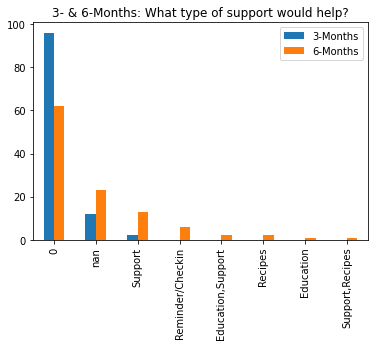

In [ ]:
feedback_df_advice.plot.bar()
plt.legend(['3-Months', '6-Months'])
plt.title('3- & 6-Months: What type of support would help?')

Text(0.5, 1.0, '3- & 6-Months: What type of support would help?')

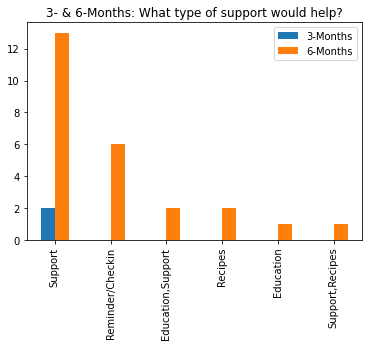

In [ ]:
feedback_df_advice = feedback_df_advice.drop(feedback_df_advice.index[[0, 1]])
feedback_df_advice.plot.bar()
plt.legend(['3-Months', '6-Months'])
plt.title('3- & 6-Months: What type of support would help?')